In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import warnings
from tkinter import *
import tkinter as tk

In [2]:
'''#Generating and feeding data
dat={'Time':[2.5,5.1,3.2,8.5,3.5,1.5,9.2],'Scores':[21,47,27,75,30,20,88]}
df=pd.DataFrame(dat)
print(df)'''
t=list()
m=list()

In [3]:
#Functions and Operations

#Function to take input and save it
def dummysave():
    try:
        tval= float(e1.get())
        mval= float(e2.get())
        t.append(tval)
        m.append(mval)
        e1.delete(0, END)
        e2.delete(0, END)
    except ValueError:
        error_label.config(text="Invalid input. Please enter numbers only.")

#Funtion holding the fundamental operation of predicting marks using linear regression 
def dummypredict():
    try:
        #preparing data
        dat = {'Time': t, 'Scores': m}
        df = pd.DataFrame(dat)

        x = df[['Time']]
        y = df[['Scores']]

        #splitting data into training and testing sets
        xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

        #creating and training the model
        model = LinearRegression()
        model.fit(xtrain, ytrain)

        #applying predictions
        predictiony = model.predict(xtest)

        warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")

        new_window = tk.Toplevel(root)
        new_window.title("Prediction")

        #function to hold the output
        def outp():
            try:    
                newval = float(e3.get())
                predv = model.predict([[newval]])
                pred = predv[0][0]  #this accesses the first element (value)

                output = f"The predicted value for {newval} hrs of study is : {pred:.2f}"

                oup = Label(new_window, text=f'{output}',font=('Century Gothic','14'))
                oup.pack()

                grb = Button(new_window, text='Graph', command=lambda:graph(newval,pred), font=('Century Gothic', '16'), fg='#FF5F62', bg='black', activeforeground='white', activebackground='#FF5F62')
                grb.pack()
            except ValueError:
                error_label.config(text="Invalid input. Please enter numbers only.")


        new_window1 = tk.Toplevel(root)
        new_window1.title("Graph")

        
        #function to display graph 
        def graph(newval,pred):
            plt.figure(figsize=(8, 6))
            plt.scatter(t, m, label='Test Data', color='blue', alpha=0.3)
            plt.scatter(newval, pred, label='Predicted Score (New Time)', color='red', marker='o', s=100)
            plt.xlabel('Time')
            plt.ylabel('Scores')
            plt.title('Linear Regression Model Predictions')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()

            frame = Frame(new_window1)
            frame.pack()

            canvas = FigureCanvasTkAgg(plt.gcf(), master=frame)
            canvas.draw()
            canvas.get_tk_widget().pack()

        labtemp = tk.Label(new_window, text="Enter the Time spent this time...",font=('Century Gothic','16'))
        labtemp.pack()

        e3 = Entry(new_window, width=10, borderwidth=5, fg='#FF5F62', bg='white', font=('Times New Roman', 15, 'bold'))
        e3.pack()

        oub = Button(new_window, text='Predict', command=outp, font=('Century Gothic', '16'), fg='#FF5F62', bg='black', activeforeground='white', activebackground='#FF5F62')
        oub.pack()

    except ValueError as e:
        error_label.config(text=f"Error: {e}")
    
#Closing function
def dummyexit():
    t.clear()
    m.clear()
    root.quit()

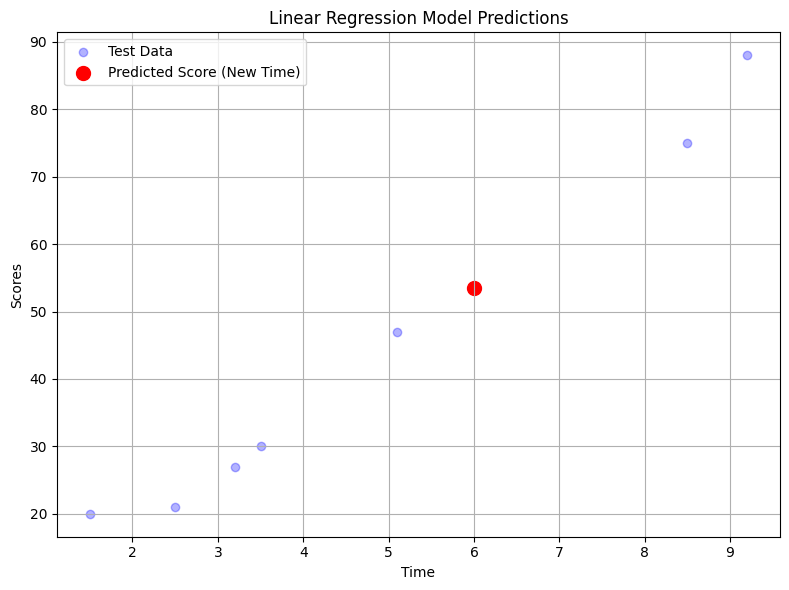

In [4]:
#GUI
root=Tk()
root.title("Predict Your Marks!")
root.iconbitmap('Pie.png')
#title text
lab=Label(root,text='Enter the previously achieved marks, and click on predict!',font=('Century Gothic','16'))
lab.grid(row=1,column=1)
lab1=Label(root,text='Time taken',font=('Century Gothic','14'))
lab2=Label(root,text='Marks Scored',font=('Century Gothic','14'))
lab1.grid(row=2,column=1)
lab2.grid(row=2,column=2)

#entrybox
e1= Entry(root,width=15,borderwidth='10',fg='#FF5F62',bg='white',font=('Times New Roman',15,'bold'))
e1.grid(row=3,column=1,columnspan=1)
e2= Entry(root,width=15,borderwidth='10',fg='#FF5F62',bg='white',font=('Times New Roman',15,'bold'))
e2.grid(row=3,column=2,columnspan=1)

#Buttons
bsave=Button(root,text='Save',font=('Century Gothic','16'),command=dummysave,fg='#FF5F62',bg='black',activeforeground='white',activebackground='#FF5F62')
bsave.grid(row=3,column=4)
bpredict=Button(root,text='Predict',font=('Century Gothic','16'),command=dummypredict,fg='#FF5F62',bg='black',activeforeground='white',activebackground='#FF5F62')
bpredict.grid(row=4,column=4)
bexit=Button(root,text='Exit',font=('Century Gothic','16'),command=dummyexit,fg='#FF5F62',bg='black',activeforeground='white',activebackground='#FF5F62')
bexit.grid(row=6,column=4)
root.mainloop()